In [4]:
from pathlib import Path
from pyDLCbehavior import YMazeAnalysis, glob_files


In [2]:
labels_ = ["WT", "Cont", "CQA"]
group_order = ["WT", "Cont", "CQA"]
color_vals = ["grey", "#00b48C", "#440154" ]

In [3]:
HOMEDIR = Path("data/YMAZE")
files_dict = glob_files(HOMEDIR)

csv_list = files_dict.get(".csv")
pkl_list = files_dict.get(".pickle")
video_list = files_dict.get(".avi")
print(csv_list, pkl_list)

[PosixPath('data/YMAZE/00229_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000.csv'), PosixPath('data/YMAZE/00230_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000.csv'), PosixPath('data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000.csv')] [PosixPath('data/YMAZE/00229_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000_meta.pickle'), PosixPath('data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000_meta.pickle')]


Saving...
Compressed pickle was saved at data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000_analysis.pkl.gz.


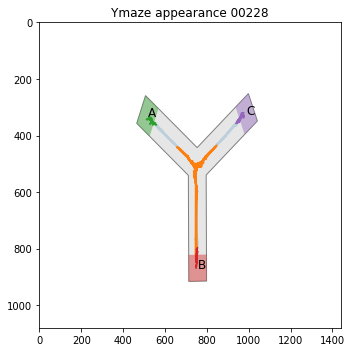

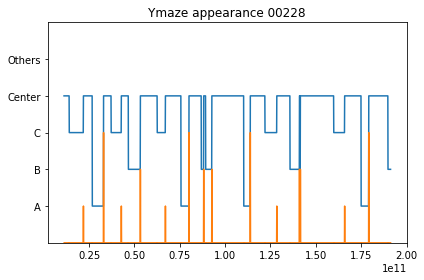

In [4]:
pkl = "data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000_meta.pickle"
csv = "data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000.csv"
ymaze = YMazeAnalysis(csv, pkl, time = 3)
ymaze.analyze()
ymaze.plot_ymaze()
ymaze.plot_alternations()
pickle_path = ymaze.to_pickle()


In [4]:
ymaze

YMazeAnalysis(csv_path=PosixPath('data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000.csv'), pkl_path=PosixPath('data/YMAZE/00228_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000_meta.pickle'), video_path=PosixPath('.'), homedir=PosixPath('data/YMAZE'), FPS=10.0, frame_dimensions=FrameDimension(width=1440, height=1080), time=3, savedir=PosixPath('data/YMAZE/save/3min'), scale_x=0.16381462672801206, scale_y=0.06740955192982767, arms=BasicYMazeCollection(data=OrderedDict([('A', ArmRegion(name='A', points=[Point(x=507.32,y=258.81), Point(x=465.29,y=356.86), Point(x=526.94,y=402.86), Point(x=568.97,y=304.81)])), ('B', ArmRegion(name='B', points=[Point(x=713.36,y=822.18), Point(x=713.84,y=915.94), Point(x=798.93,y=914.73), Point(x=798.44,y=820.97)])), ('C', ArmRegion(name='C', points=[Point(x=998.58,y=251.79), Point(x=937.42,y=299.55), Point(x=980.47,y=396.39), Point(x=1041.63,y=348.63)]))])), total_distance=788.4904829905888, mean_speed=4.38050268328

In [5]:
from pyDLCbehavior import glob_files, NovelObjectRecognitionAnalysis

HOMEDIR = Path("data/NOR")
files_dict = glob_files(HOMEDIR)

csv_list = files_dict.get(".csv")
pkl_list = files_dict.get(".pickle")
video_list = files_dict.get(".avi")

print(csv_list, pkl_list, video_list)


[PosixPath('data/NOR/00301_subset1DLC_resnet50_Colab_200204Feb4shuffle1_781000.csv'), PosixPath('data/NOR/00301_subset2DLC_resnet50_Colab_200204Feb4shuffle1_781000.csv')] [PosixPath('data/NOR/00301_subset2DLC_resnet50_Colab_200204Feb4shuffle1_781000includingmetadata.pickle'), PosixPath('data/NOR/00301_subset1DLC_resnet50_Colab_200204Feb4shuffle1_781000includingmetadata.pickle')] None


OpenCV: Couldn't read video stream from file "data/NOR/00301_subset2DLC_resnet50_Colab_200204Feb4shuffle1_781000includingmetadata.pickle"


Saving...
Compressed pickle was saved at data/NOR/00301_subset1DLC_resnet50_Colab_200204Feb4shuffle1_781000_analysis.pkl.gz.


OpenCV: Couldn't read video stream from file "data/NOR/00301_subset1DLC_resnet50_Colab_200204Feb4shuffle1_781000includingmetadata.pickle"


Saving...
Compressed pickle was saved at data/NOR/00301_subset2DLC_resnet50_Colab_200204Feb4shuffle1_781000_analysis.pkl.gz.


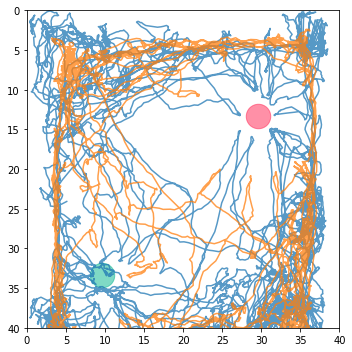

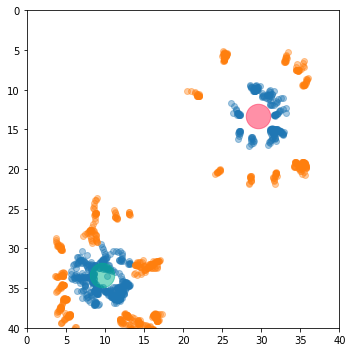

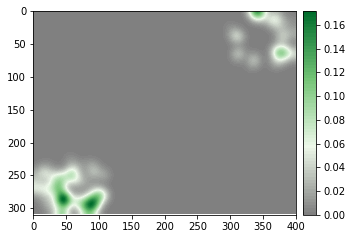

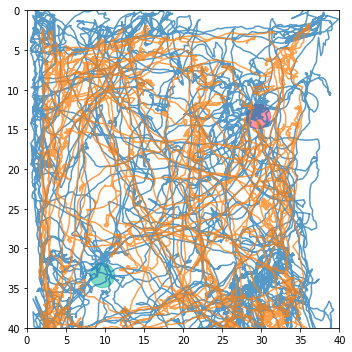

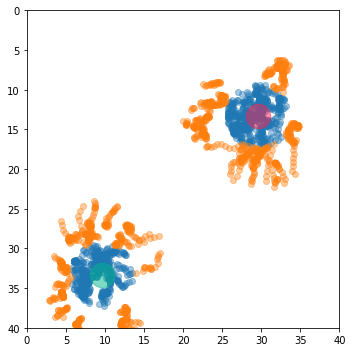

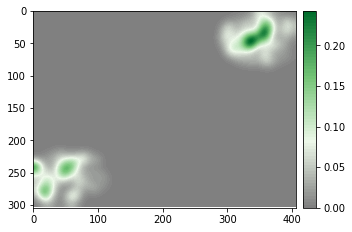

In [9]:
from pyDLCbehavior import Roi
# example workflow
def workflow(nor: NovelObjectRecognitionAnalysis) -> None:
    # select object
    #nor.select_objects(num_of_objects=2)

    # [OPTION] add object manually
    nor.add_object(Roi(x = 231, y = 119))
    nor.add_object(Roi(x = 75, y = 298))
    nor.analyze()

    nor.plot_trajectory()
    nor.plot_filter_scatter()
    nor.plot_heatmap()

    nor.to_pickle()

video_list = pkl_list
nor_list = []
for csv, pkl, video in zip(csv_list, pkl_list, video_list):
    nor = NovelObjectRecognitionAnalysis(csv, pkl, video)
    workflow(nor)
    nor_list.append(nor)

In [12]:
ymaze = YMazeAnalysis.from_pickle(pickle_path)
ymaze

coords
x              75.197689
y             298.794998
likelihood      1.000000
dtype: float64